In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [4]:
plt.rcParams["figure.figsize"] = (15, 6)
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
block_plot = False

In [5]:
# Create Data
def create_data():

    # Random manual seed for consistency.
    tf.random.set_seed(42)

    num_data = 30

    # Create some data that is roughly linear (but not exactly).
    x = 10 * tf.random.uniform(shape=[num_data])
    y = x + tf.random.normal(stddev= 0.3, shape=[num_data])

    return x, y

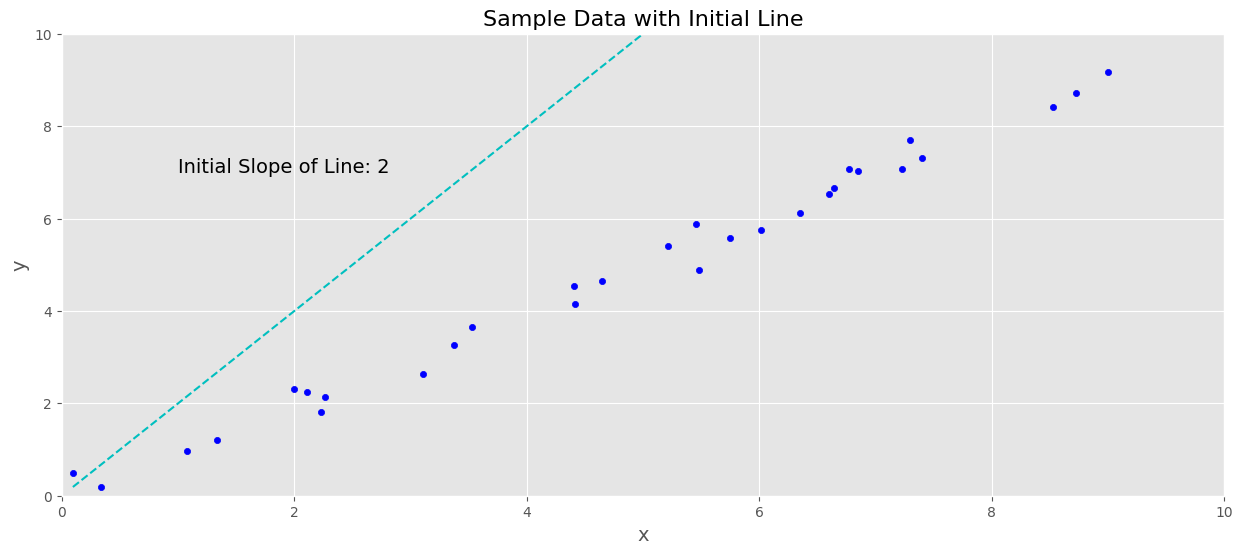

In [6]:
# Create some data.
x, y = create_data()

# Generate the data for the initial line with a slope of 2.
xmin = tf.reduce_min(x)
xmax = tf.reduce_max(x)

xplot = np.linspace(xmin, xmax, 2)
m0 = 2
yplot = m0 * xplot

# Plot the sample data and the initial guess for a line.
plt.figure
plt.scatter(x, y, color='blue', s=20)
plt.xlabel('x')
plt.ylabel('y')
plt.plot(xplot, yplot, 'c--')
plt.title('Sample Data with Initial Line')
plt.text(1, 7, 'Initial Slope of Line: ' + str(m0), fontsize=14)
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show(block=block_plot)

Minimum Loss:   0.07493041
Best parameter:  0.97959185


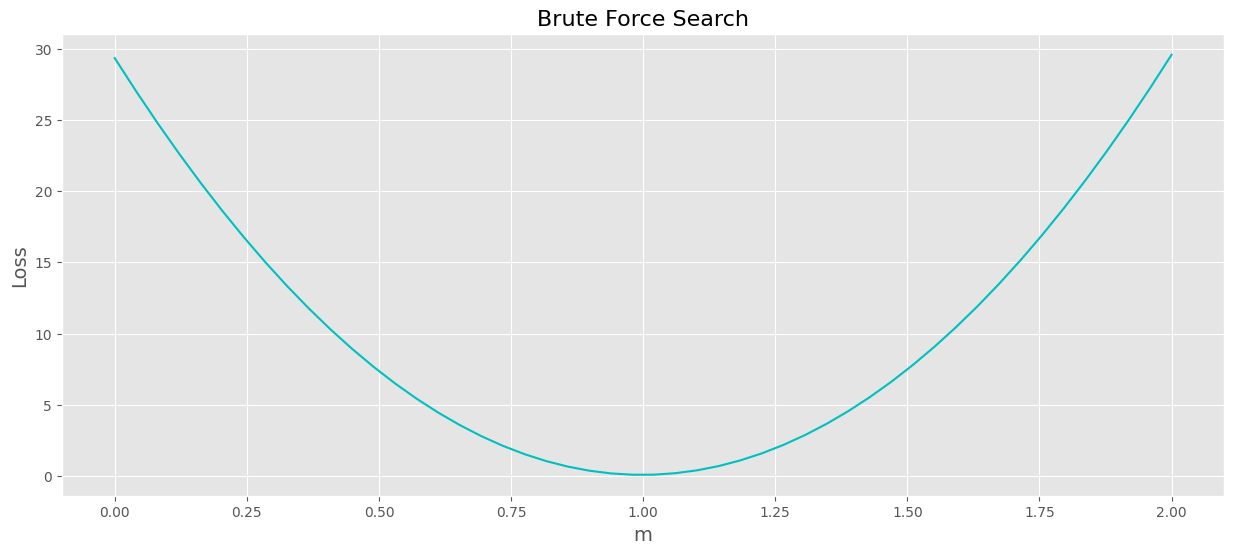

In [7]:
# Brute Force Search
# Minimum value of m.
min_val = 0.0

# Maximum value of m
max_val = 2.0

# Number of steps between min and max values.
num_steps = 50

# Step size.
step_size = (max_val - min_val)/(num_steps - 1)

# Space for storing all values of m.
m = tf.Variable(tf.zeros(shape=[num_steps]))

# Space for storing loss corresponding to different values of m.
loss = tf.Variable(tf.zeros(shape=[num_steps]))

# Calculate loss for all possible m.
for i in range(0, num_steps):
    m[i].assign(min_val +  i * step_size)
    e = y - m[i] * x
    loss[i].assign(tf.reduce_sum(tf.multiply(e, e))/len(x))

# Find the index for lowest loss.
i = tf.argmin(loss)

# Save best slope.
m_best = m[i].numpy()

# Minimum loss.
print('Minimum Loss:  ', loss[i].numpy())

# Find the value of m corresponding to lowest loss.
print('Best parameter: ', m_best)

# Plot loss vs m.
plt.figure
plt.plot(m.numpy(), loss.numpy(), 'c-')
plt.xlabel('m')
plt.ylabel('Loss')
plt.title("Brute Force Search")
plt.show(block=block_plot)

In [8]:
# Compare the model with the data
def plot_linear_model(x, y, m_best, xlim=(0, 10), ylim=(0, 10)):

    # Generate the line based on the optimal slope.
    xmin = tf.reduce_min(x)
    xmax = tf.reduce_max(x)
    ymin = tf.reduce_min(y)
    ymax = tf.reduce_max(y)

    xplot = np.linspace(xmin, xmax, 2)
    yplot = m_best * xplot

    # Plot the data and the model.
    plt.figure
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.plot(xplot, yplot, 'c-')
    plt.scatter(x, y, color='blue', s=20)
    plt.xlabel('x')
    plt.ylabel('y')
    xc = .05 * (xmax - xmin)
    yc = .95 * (ymax - ymin)
    plt.text(xc, yc, 'Slope: ' + str(int(m_best*1000)/1000), fontsize=14)
    plt.show(block=block_plot)

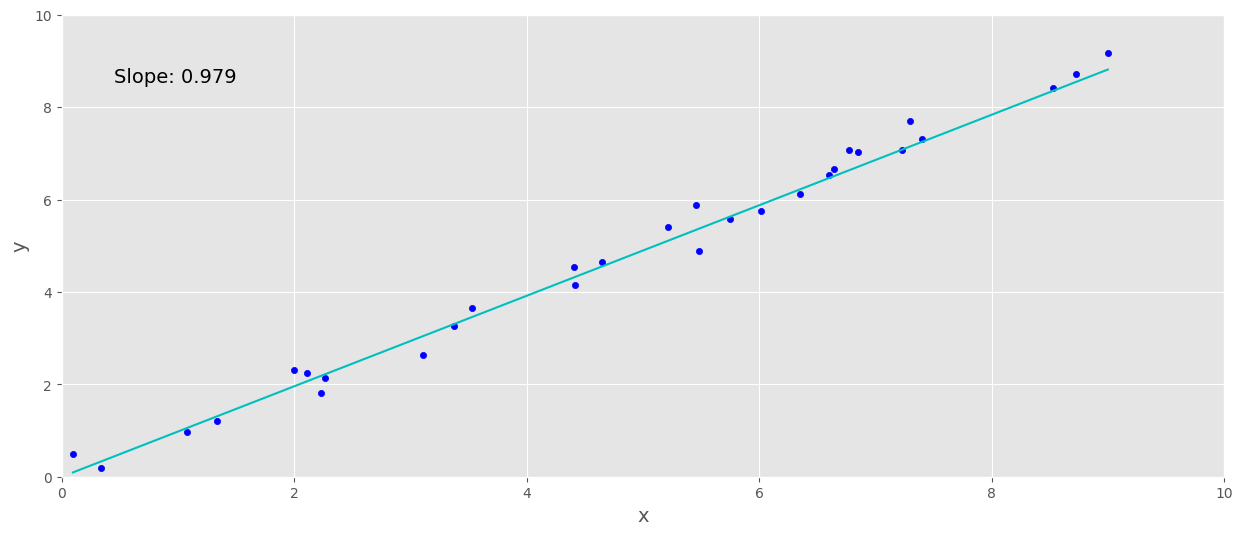

In [9]:
plot_linear_model(x, y, m_best)

In [10]:
# Gradient Descent

# Parameter settings.
num_iter0 = 50
lr0 = 0.005 #learning ratio
# Initial guess for m.
m0 = 2

max_loss = 30. # For plot scale.

Minimum loss:    0.065009825
Best parameter:  0.99795854


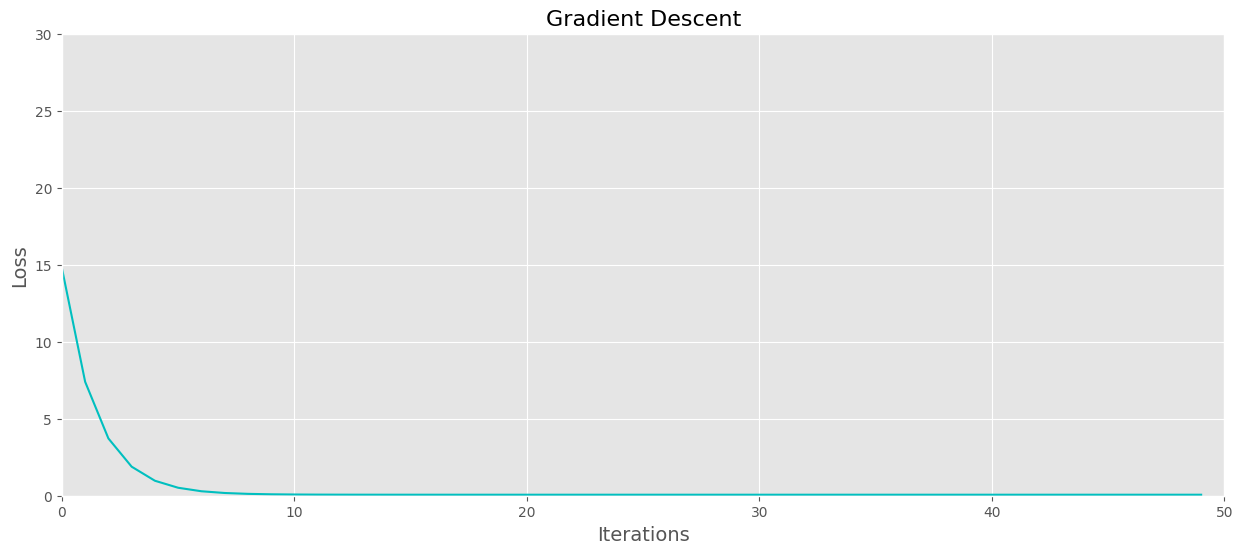

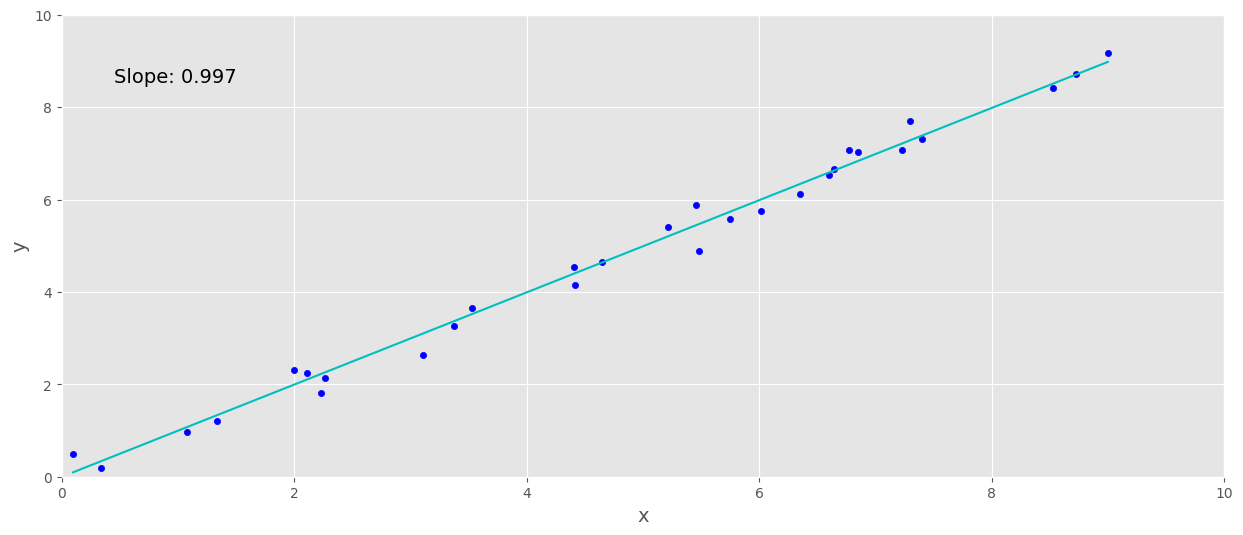

In [11]:
num_iter = num_iter0
lr = lr0
m = m0

# Loss for Gradient Descent.
loss_gd = tf.Variable(tf.zeros(shape=[num_iter]))

# Calculate the loss.
for i in range(0, num_iter):

    # Compute the gradient using the entire dataset.
    g = -2 * tf.reduce_sum(x * (y - m * x))/len(x)

    # Update the parameter, m.
    m = m -  lr * g

    # Compute the loss for the updated value of m.
    e = y - m * x
    loss_gd[i].assign(tf.reduce_sum(tf.multiply(e,e))/len(x))

m_best =  m.numpy()

print('Minimum loss:   ', loss_gd[-1].numpy())
print('Best parameter: ', m_best)

# Plot loss vs m
plt.figure
plt.plot(loss_gd.numpy(), 'c-')
plt.xlim(0, num_iter)
plt.ylim(0, max_loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Gradient Descent')
plt.show(block=block_plot)

plot_linear_model(x, y, m_best)

Minimum loss:    2.1572194
Best parameter:  [1.0132731]


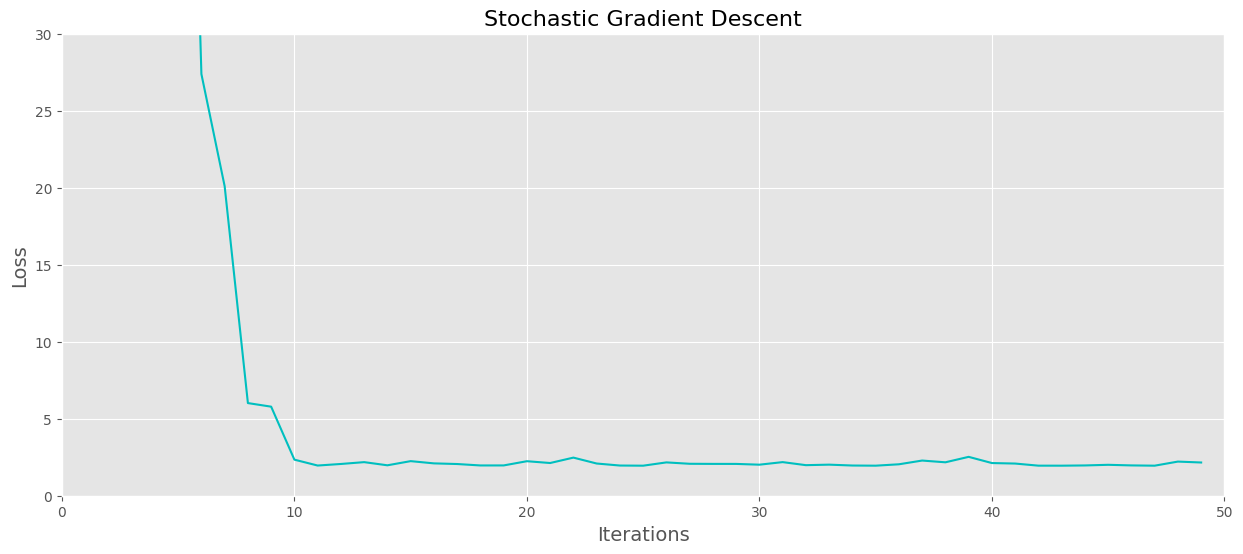

/tmp/ipython-input-3349934459.py:23: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(xc, yc, 'Slope: ' + str(int(m_best*1000)/1000), fontsize=14)


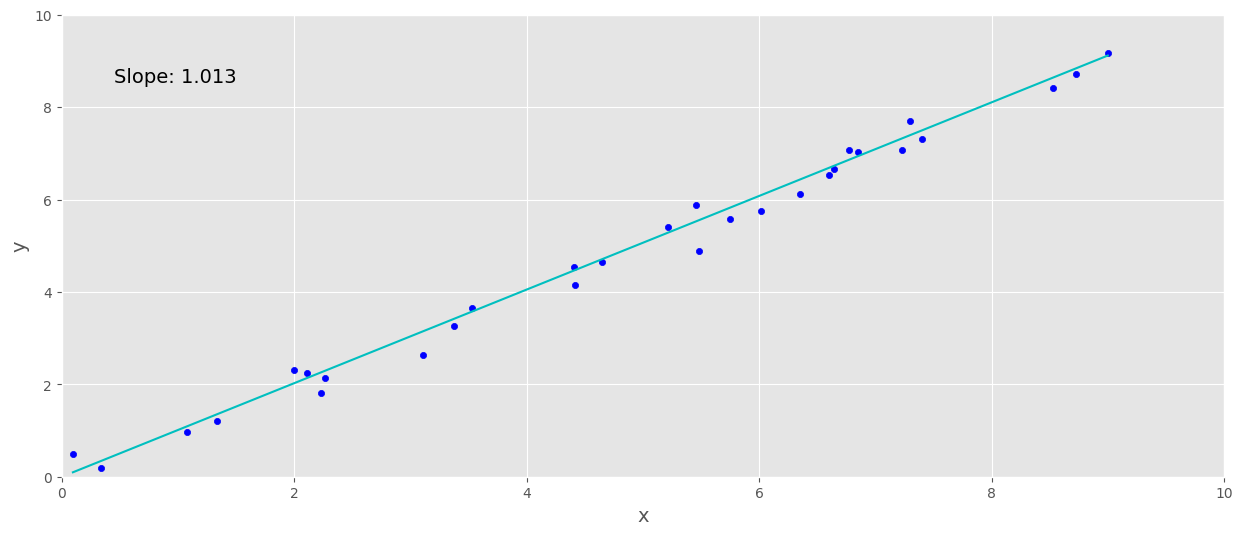

In [12]:
# Stochastic Gradient Descent
num_iter = num_iter0
lr = lr0
m = m0

# Loss for Stochastic Gradient Descent.
loss_sgd = tf.Variable(tf.zeros(num_iter))

for i in range(0, num_iter):

    # Randomly select a training data point.
    k = tf.random.uniform([1], minval=0, maxval=len(y), dtype=tf.dtypes.int32)

    # Calculate the gradient using a single data point.
    g = -2 * tf.gather(x, k) * (tf.gather(y, k) - m * tf.gather(x, k))

    # Update the parameter, m.
    m = m - lr * g

    # Compute the loss for the updated value of m.
    e = y - m * x
    loss_sgd[i].assign(tf.reduce_sum(tf.multiply(e,e)))

m_best = m.numpy()

print('Minimum loss:   ', loss_sgd[-1].numpy())
print('Best parameter: ', m_best)

# Plot loss vs m
plt.figure
plt.plot(loss_sgd.numpy(), 'c-')
plt.xlim(0, num_iter)
plt.ylim(0, max_loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Stochastic Gradient Descent');

plt.show(block=block_plot)
plot_linear_model(x, y, m_best)

Minimum loss:    0.19519801
Best parameter:  0.99657613


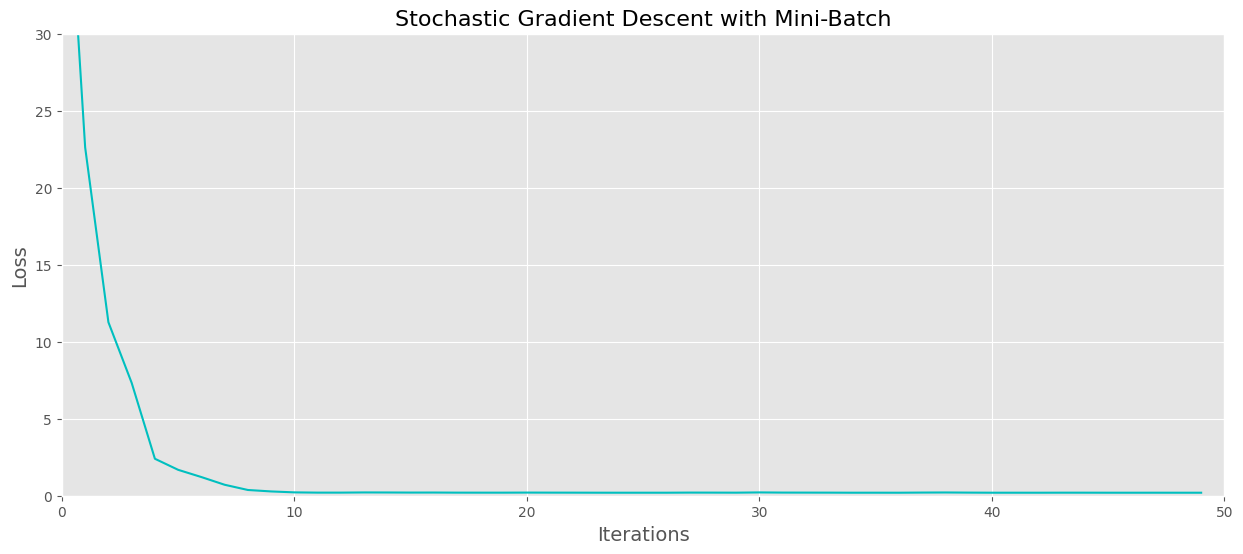

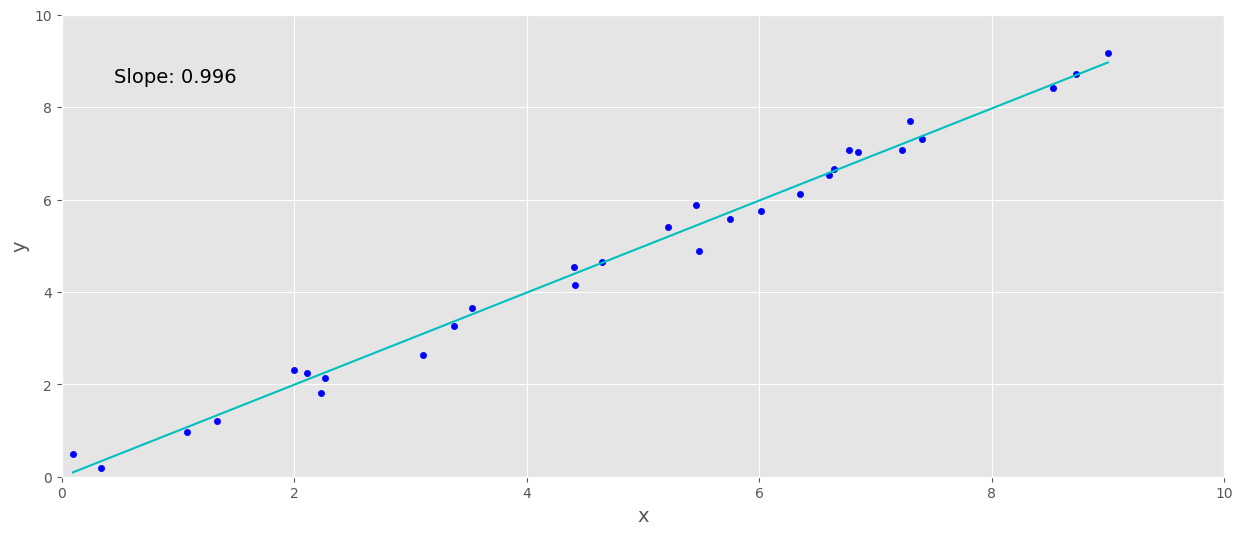

In [13]:
# Stochastic Gradient Descent with mini-batch
num_iter = num_iter0
lr = lr0
m = m0

batch_size = 10

# Loss for Gradient Descent with Mini-Batch.
loss_sgd_mb = tf.Variable(tf.zeros(num_iter))

for i in range(0, num_iter):

    # Randomly select a batch of data points.
    k = tf.random.uniform([batch_size], minval=0, maxval=len(y)-1, dtype=tf.dtypes.int32)

    # Calculate the gradient using a mini-batch.
    g = -2 * tf.reduce_sum(tf.gather(x, k) * (tf.gather(y, k) - m * tf.gather(x, k)))/batch_size

    # Update the parameter, m.
    m = m -  lr * g

    # Compute the loss for the updated value of m.
    e = y - m * x
    loss_sgd_mb[i].assign(tf.reduce_sum(tf.multiply(e,e))/batch_size)

m_best = m.numpy()

print('Minimum loss:   ', loss_sgd_mb[-1].numpy())
print('Best parameter: ', m.numpy())

# Plot loss vs m.
plt.figure
plt.plot(loss_sgd_mb.numpy(), 'c-')
plt.xlim(0, num_iter)
plt.ylim(0, max_loss);
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Stochastic Gradient Descent with Mini-Batch')
plt.show(block=block_plot)

plt.show(block=block_plot)
plot_linear_model(x, y, m_best)

In [15]:
# Gradient Tape
# Create a tensorflow variable.
x = tf.Variable(4.0)

# Create a GradientTape context.
with tf.GradientTape() as tape:
    # Create a new tensor y which equals the square of the x tensor.
    y = x * x

# Compute the derivative of y with respect to the input tensor x.
dy_dx = tape.gradient(y, x)
print('dy_dx: \n', dy_dx.numpy())

dy_dx: 
 8.0


In [16]:
# Create a tensorflow variables.
w1 = tf.Variable(5.0)
w2 = tf.Variable(3.0)

# Create a GradientTape context.
with tf.GradientTape(persistent=True) as tape:
    z = 3 * w1 ** 2 + 2 * w1 * w2

# Compute the gradients.
dz_dw1 = tape.gradient(z, w1)
dz_dw2 = tape.gradient(z, w2)
del tape
print('dz_dw1: \n', dz_dw1.numpy())
print('dz_dw2: \n', dz_dw2.numpy())

dz_dw1: 
 36.0
dz_dw2: 
 10.0


Minimum loss:    0.065009825
Best parameter:  0.99795854


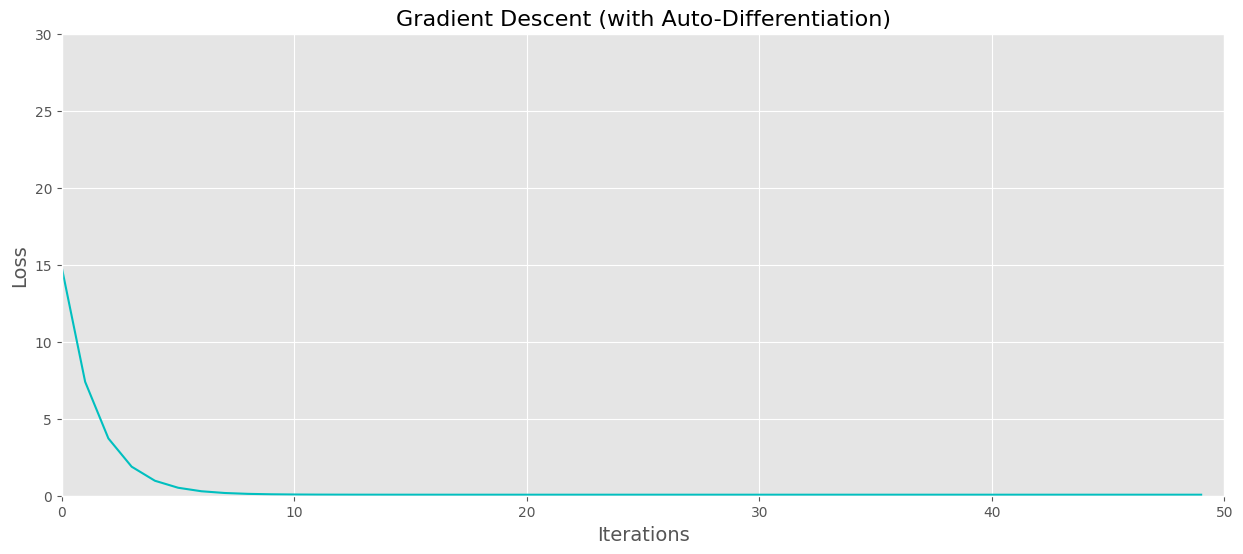

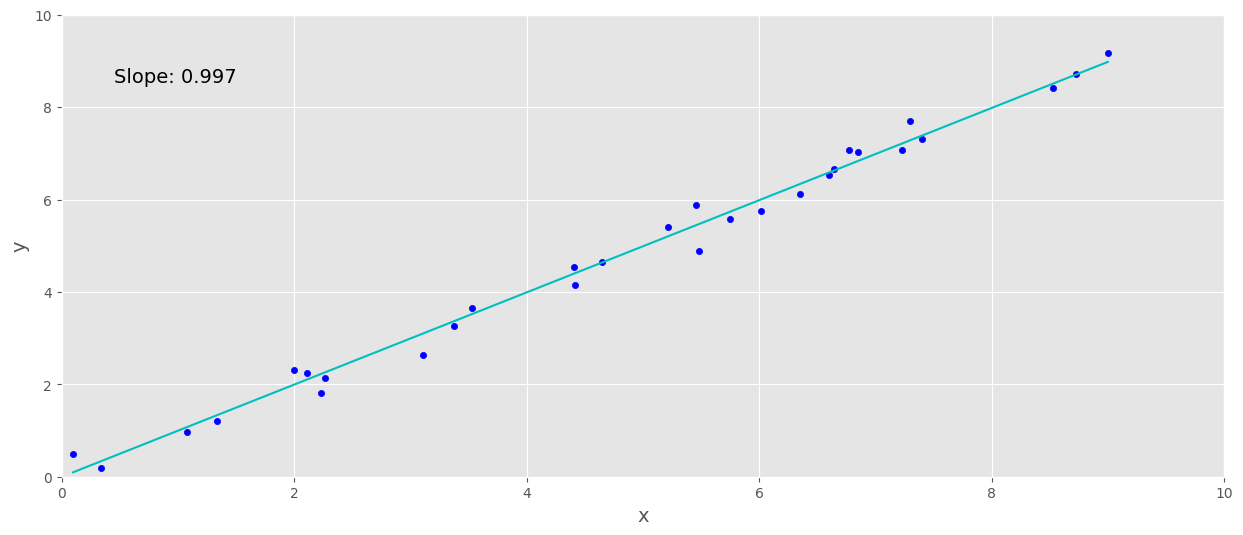

In [20]:
num_iter = num_iter0
lr = lr0
m  = tf.Variable(2.0)  # Initial guess for m.

x, y = create_data()

loss_gd = tf.Variable(tf.zeros(shape=[num_iter]))

for i in range(0, num_iter):

    # Set up a gradient tape context to monitor operations on variables.
    with tf.GradientTape() as tape:
        # MSE loss.
        loss = tf.pow((y - m * x), 2)/len(x)

    # Compute the gradient of the loss with respect to m automatically.
    dl_dm = tape.gradient(loss, m)

    # Update the paramter m.
    m.assign_sub(lr * dl_dm)

    # Compute the loss for the updated value of m.
    e = y - m * x
    loss_gd[i].assign(tf.reduce_sum(tf.multiply(e,e))/len(x))

m_best =  m.numpy()
print('Minimum loss:   ', loss_gd[-1].numpy())
print('Best parameter: ', m_best)

# Plot loss vs m.
plt.figure
plt.plot(loss_gd.numpy(), 'c-')
plt.xlim(0, num_iter)
plt.ylim(0, max_loss)
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.title('Gradient Descent (with Auto-Differentiation)')
plt.show(block=block_plot)

plot_linear_model(x, y, m_best)
